In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from typing import List
import numpy as np
import pandas as pd

import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

from gaussian_model import LinearKernel, ConstantKernel
from gaussian_model import ExponentialKernel, PeriodicKernel
from gaussian_model import WhiteNoiseKernel, GaussKernel
from gaussian_model import Gaussian_Process_Regression

from sklearn.gaussian_process import kernels
from sklearn.gaussian_process import GaussianProcessRegressor

%matplotlib inline
%matplotlib ipympl

ite:1  mse:5653.440420994361  x_new:(np.float64(0.9999997709864082), np.float64(0.9999997696240932), np.float64(0.9999992053000539), np.float64(1.0000003639795414), np.float64(0.9999997576054617), np.float64(0.9999998715517139), np.float64(0.9999995492033689), np.float64(0.9999998367818014), np.float64(0.9999996860555616), 0.49999253164477164)
ite:1001  mse:5720.634550324538  x_new:(np.float64(0.9997707412731033), np.float64(0.9997694029770455), np.float64(0.9992015358367078), np.float64(1.0003669866232712), np.float64(0.999757465508085), np.float64(0.999871741306342), np.float64(0.9995482582621843), np.float64(0.9998367404990631), np.float64(0.999685542300364), 0.4925303398442012)
ite:2001  mse:5789.401175894833  x_new:(np.float64(0.999541678686239), np.float64(0.9995390547893007), np.float64(0.9983978465042379), np.float64(1.0007389627970167), np.float64(0.9995153786013949), np.float64(0.9997442488848243), np.float64(0.9990959741748592), np.float64(0.9996738885914036), np.float64(0.9

/Users/h_nagino/work/github/Leaning_Gaussian_kernel/gaussian_model.py:792: RuntimeWarning: invalid value encountered in sqrt
  y_std = np.sqrt(y_var)


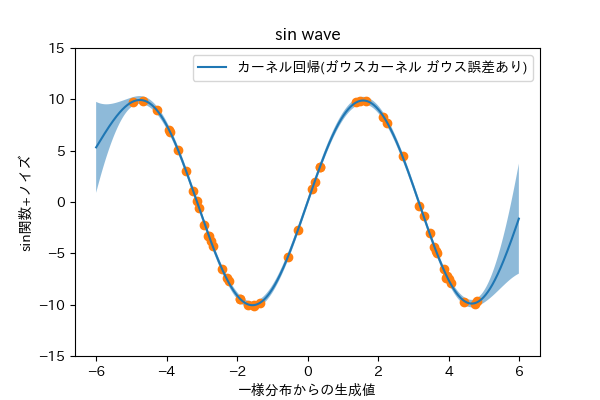

In [ ]:
def wave_dataset(size:int, xlim:List=[0, 1], scale:float|None=None) -> pd.DataFrame:
    x = np.random.uniform(xlim[0], xlim[1], size)
    y = 10*np.sin(x)
    if scale is not None:
        noize = np.random.normal(0, scale, size)
        y = y + noize
    df = pd.DataFrame()
    df['x'] = x
    df['y'] = y
    return df

train_num  = 25
train_data = wave_dataset(train_num, xlim=[-5, 5], scale=0.1)
X_axis     = np.arange(-6, 6, 0.01)


kernel = LinearKernel(alpha=1) + ConstantKernel(alpha=1)\
		 + ExponentialKernel(alpha=1, beta=1)\
		 + PeriodicKernel(alpha=1, beta=1, gamma=1)\
         + GaussKernel(alpha=1, beta=1)\
         + WhiteNoiseKernel(alpha=1)
model  = Gaussian_Process_Regression(
    		train_data['x'].values.reshape((-1, 1)), 
            train_data['y'].values.reshape((-1, 1)),
            kernel=kernel, 
            norm_α=2, 
            l1_ratio=0.2, 
            eta=1e-7, 
            tol=1e-3, 
            max_iterate=1000000)
# solver = "external library"
solver = "ISTA"
model.fit(solver=solver)

pred_mean, pred_std = model.predict(X_axis.reshape((-1, 1)), return_std=True)
pred_mean = pred_mean.reshape(-1)

# データを描画
plt.figure(figsize=(6, 4))
plt.plot(X_axis, pred_mean, label='カーネル回帰(ガウスカーネル ガウス誤差あり)')
plt.fill_between(X_axis, pred_mean - 3*pred_std, pred_mean + 3*pred_std, alpha=0.5)
plt.scatter(train_data['x'].values, train_data['y'].values, marker='o')
plt.title('sin wave')
plt.xlabel('一様分布からの生成値')
plt.ylabel('sin関数+ノイズ')
plt.ylim((-1.5*10, 1.5*10))
plt.legend()
plt.show()

In [ ]:
kernel.get_theta()